<a href="https://colab.research.google.com/github/nommrichard/prod_rating/blob/main/simpler_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting product rating based on review text 

## Project in LTAT.01.001 Natural language processing

#### Team members: Karl Jaagup Kask, Ludvig Leis, Richard Nõmm

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


!python3 -m nltk.downloader stopwords
!python3 -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
RANDOM_SEED = 100

The data we are using: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products

## Data preprocessing (data file needs to be imported)

In [6]:
df = pd.read_csv('amazon_review_dataset.csv') #renamed



In [7]:
df = df[df['reviews.rating'].notnull() & df['reviews.text'].notnull()]
df= df[['reviews.rating','reviews.text']]

df.rename(columns = {'reviews.rating':'rating', 'reviews.text':'text'}, inplace = True)
df['text'][0]
cleaned = df['text']
print(cleaned[0])

I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.


In [8]:
stops = stopwords.words('english')

remove_punc = re.compile('[^a-z]+')
def clean_text(sent):
    sent = str(sent).lower()
    sent = remove_punc.sub(' ', sent).strip()
    filtered = [word for word in sent.split() if word not in stops]
    sentence = " ".join(filtered) #just joined -> laused
  
    #sentence = nltk.word_tokenize(sentence) #tokenized -> listid
    return sentence


clean_text(df['text'][0])
reviews = [clean_text(sent) for sent in df['text']]

In [9]:
reviews = [clean_text(sent) for sent in df['text']]

In [10]:
df['text'] = reviews
df['text']

0        order one item bad quality missing backup spri...
1          bulk always less expensive way go products like
2                                well duracell price happy
3        seem work well name brand batteries much bette...
4                       batteries long lasting price great
                               ...                        
28327    got yr old twins yr old one one better perfect...
28328           bought niece christmas gift years old love
28329    nice light internet browsing keeping top email...
28330    tablet absolutely everything want watch tv sho...
28331    ninety dollars expectionations low still good ...
Name: text, Length: 28332, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


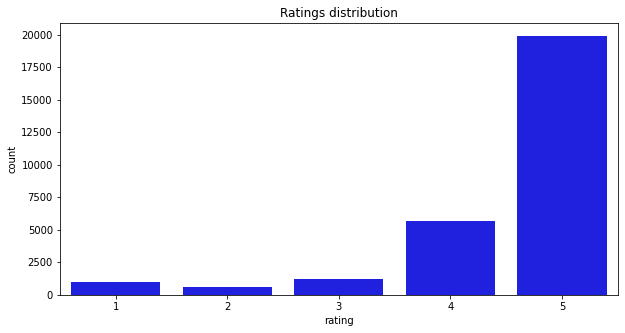

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(df['rating'], color= "blue")
plt.title('Ratings distribution')
plt.show()

## I Naive-Bayes approach

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer #TF_IDF

tfidf_Vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=10000, stop_words='english') #mida need muudavad?
tfidf_features = tfidf_Vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_Vectorizer.get_feature_names())
tfidf_df.head()

,aa,aaa,aaas,aas,abc,abcmouse,abcs,abilities,ability,abit,abke,able,abount,absolute,absolutely,absorbs,abundance,abuse,abused,ac,acc,accedently,accent,accents,accept,acceptable,acceptably,accepted,acces,access,accessed,accesses,accessibility,accessible,accessing,accessories,accident,accidental,accidentally,accidently,...,yahoo,yard,yay,yea,yeah,year,yeari,yearly,years,yellow,yellowish,yep,yer,yes,yesterday,yo,yokod,york,yoru,youand,young,younger,youngest,youngster,youngsters,youre,youreyes,youth,youtube,yr,yrs,yucky,yup,zero,zinio,zipper,zippers,zippy,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.feature_extraction.text import CountVectorizer #bag-of-words


# perform vectorization on our cleaned text 
bow_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english', max_features=10000)
bow_features = bow_vectorizer.fit_transform(df['text'])
bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names())
bow_df.head()

,aa,aaa,aaas,aas,abc,abcmouse,abcs,abilities,ability,abit,abke,able,abount,absolute,absolutely,absorbs,abundance,abuse,abused,ac,acc,accedently,accent,accents,accept,acceptable,acceptably,accepted,acces,access,accessed,accesses,accessibility,accessible,accessing,accessories,accident,accidental,accidentally,accidently,...,yahoo,yard,yay,yea,yeah,year,yeari,yearly,years,yellow,yellowish,yep,yer,yes,yesterday,yo,yokod,york,yoru,youand,young,younger,youngest,youngster,youngsters,youre,youreyes,youth,youtube,yr,yrs,yucky,yup,zero,zinio,zipper,zippers,zippy,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

X = bow_df #BOW ON PAREM
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

[[ 123    2    2   18   49]
 [  35   17    3   13   50]
 [  16    6   25   64  130]
 [  16    3    5  347  741]
 [  60    9   23  229 3681]]


              precision    recall  f1-score   support

           1       0.49      0.63      0.55       194
           2       0.46      0.14      0.22       118
           3       0.43      0.10      0.17       241
           4       0.52      0.31      0.39      1112
           5       0.79      0.92      0.85      4002

    accuracy                           0.74      5667
   macro avg       0.54      0.42      0.44      5667
weighted avg       0.71      0.74      0.71      5667



0.7814251047871167

In [15]:
# TDIDF-ga
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

X = tfidf_df #BOW ON PAREM
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

[[  13    0    0   14  167]
 [   5    0    0    5  108]
 [   0    0    0   23  218]
 [   0    0    0  119  993]
 [   0    0    1   29 3972]]


              precision    recall  f1-score   support

           1       0.72      0.07      0.12       194
           2       0.00      0.00      0.00       118
           3       0.00      0.00      0.00       241
           4       0.63      0.11      0.18      1112
           5       0.73      0.99      0.84      4002

    accuracy                           0.72      5667
   macro avg       0.42      0.23      0.23      5667
weighted avg       0.66      0.72      0.63      5667



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7344804765056254

## II Logistic regression approach

In [16]:
# TFIDF 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l2", C=10, solver="liblinear", max_iter=500)

X = tfidf_df #BOW ON PAREM
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

lr.fit(X_train, y_train)

preds = lr.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
lr.score(X_train, y_train)

[[ 111    8    9    8   58]
 [  20   33   10   16   39]
 [   5    2   62   40  132]
 [   4    7   17  396  688]
 [  10    5   19  196 3772]]


              precision    recall  f1-score   support

           1       0.74      0.57      0.65       194
           2       0.60      0.28      0.38       118
           3       0.53      0.26      0.35       241
           4       0.60      0.36      0.45      1112
           5       0.80      0.94      0.87      4002

    accuracy                           0.77      5667
   macro avg       0.66      0.48      0.54      5667
weighted avg       0.75      0.77      0.75      5667



0.8520626516655636

In [17]:
# BOW
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l2", C=10, solver="liblinear", max_iter=500)

X = bow_df #BOW ON PAREM
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

lr.fit(X_train, y_train)

preds = lr.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
lr.score(X_train, y_train)

[[ 122    7    7    6   52]
 [  17   40   12   14   35]
 [   5    5  103   26  102]
 [   4    9   27  461  611]
 [  13   15   25  208 3741]]


              precision    recall  f1-score   support

           1       0.76      0.63      0.69       194
           2       0.53      0.34      0.41       118
           3       0.59      0.43      0.50       241
           4       0.64      0.41      0.50      1112
           5       0.82      0.93      0.88      4002

    accuracy                           0.79      5667
   macro avg       0.67      0.55      0.60      5667
weighted avg       0.77      0.79      0.77      5667



0.8782263401720715

## III ADABOOST, trying both Bag Of Words and TF-IDF method


In [18]:
## ADABOOST, trying both Bag Of Words and TF-IDF method
from sklearn.ensemble import AdaBoostClassifier

X_train_bow, X_metric_bow, y_train_bow, y_metric_bow = train_test_split(bow_df, y, test_size=0.2, random_state=100)
X_test_bow, X_valid_bow, y_test_bow, y_valid_bow = train_test_split(X_metric_bow, y_metric_bow, test_size=0.5, random_state=100)


X_train_tfidf, X_metric_tfidf, y_train_tfidf, y_metric_tfidf = train_test_split(tfidf_df, y, test_size=0.2, random_state=100)
X_test_tfidf, X_valid_tfidf, y_test_tfidf, y_valid_tfidf = train_test_split(X_metric_tfidf, y_metric_tfidf, test_size=0.5, random_state=100)

ada_bow = ada_tfidf = AdaBoostClassifier(n_estimators=100, learning_rate=0.001)

ada_bow.fit(X_train_bow, y_train_bow)
ada_tfidf.fit(X_train_tfidf, y_train_tfidf)

preds_bow = ada_bow.predict(X_test_bow)
preds_tfidf = ada_tfidf.predict(X_test_tfidf)

print("Bag Of Words with ADABOOST")
print(confusion_matrix(y_test_bow, preds_bow))
print(classification_report(y_test_bow, preds_bow))
print('\n')
print("TF-IDF method with ADABOOST")
print(confusion_matrix(y_test_tfidf, preds_tfidf))
print(classification_report(y_test_tfidf, preds_tfidf))


Bag Of Words with ADABOOST
[[   0    0    0    0   89]
 [   0    0    0    0   70]
 [   0    0    0    0  134]
 [   0    0    0    0  563]
 [   0    0    0    0 1977]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00       134
           4       0.00      0.00      0.00       563
           5       0.70      1.00      0.82      1977

    accuracy                           0.70      2833
   macro avg       0.14      0.20      0.16      2833
weighted avg       0.49      0.70      0.57      2833



TF-IDF method with ADABOOST
[[   0    0    0    0   89]
 [   0    0    0    0   70]
 [   0    0    0    0  134]
 [   0    0    0    0  563]
 [   0    0    0    0 1977]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00        70
         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
